<a href="https://colab.research.google.com/github/arkapravo-dey/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#reading the csv file into dataframe df
df = pd.read_csv('/content/Salary_Data.csv')

In [49]:
print(df.head())

print(df.describe())

print(df.isnull().sum())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000       

In [50]:
#Fixing the input variable as 'Years of Experience' and output target variable as 'Salary'
columns_to_drop = ['Gender','Education Level','Job Title','Salary','Age']
X = df.drop(columns=columns_to_drop)
y = df['Salary']

In [51]:
X

,Years of Experience
0,5.0
1,3.0
2,15.0
3,7.0
4,20.0
...,...
6699,20.0
6700,3.0
6701,4.0
6702,14.0


In [52]:
y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6699    200000.0
6700     50000.0
6701     55000.0
6702    140000.0
6703     35000.0
Name: Salary, Length: 6704, dtype: float64

In [53]:
# Replacing the empty values in X column by their mean
X.fillna(X.mean(), inplace=True)

In [54]:
# Replacing the empty values in y column by their mean
y.fillna(y.mean(),inplace = True)

In [55]:
#Spliting the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
#Training the LinearRegression model on X_train and y_train
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)

# Calculating the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculating the R-squared (R²) value
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 927079077.8702136
Root Mean Squared Error (RMSE): 30447.973296595843
R-squared (R²): 0.6528690431769462


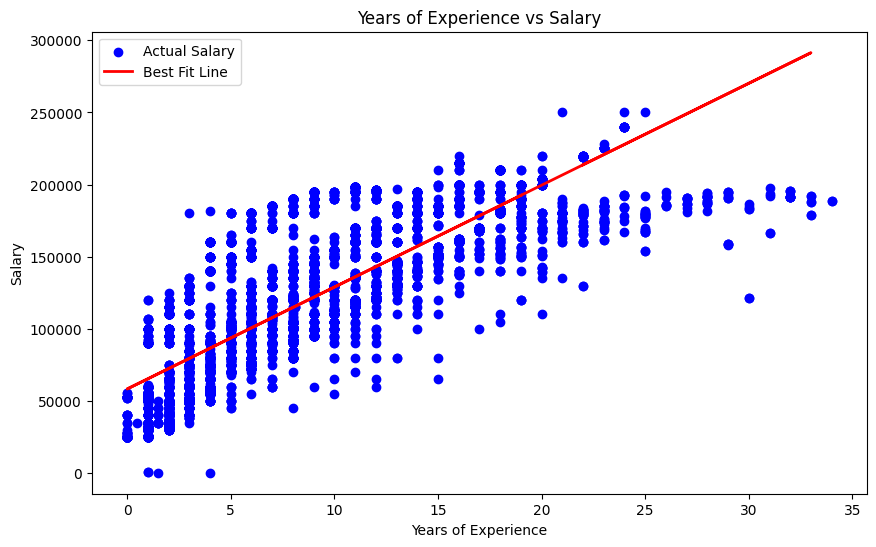

In [58]:
# Ploting the scatter plot and best fit line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.legend()
plt.show()